<a href="https://colab.research.google.com/github/ahmddbilall/AI_Competition_Softec/blob/Abdullah/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

!git clone https://github.com/ahmddbilall/AI_Competition_Softec.git

Cloning into 'AI_Competition_Softec'...
remote: Enumerating objects: 374, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 374 (delta 3), reused 7 (delta 1), pack-reused 360
Receiving objects: 100% (374/374), 503.69 MiB | 25.57 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Updating files: 100% (292/292), done.


# Data prepration

In [8]:
mitosis_dir = '/content/AI_Competition_Softec/softec-aic-2024/Training Images/Mitosis'
normal_dir = '/content/AI_Competition_Softec/softec-aic-2024/Training Images/Normal'

img_size = (64, 64)

X = []
Y = []

for i in range(0, 226):
    filename = str(i) + '.jpg'

    if filename in os.listdir(mitosis_dir):
        label = 1
    else:
        label = 0

    img = Image.open(os.path.join(mitosis_dir if label else normal_dir, filename))
    img = img.resize(img_size)

    # Convert image to numpy array and normalize
    img_array = np.array(img) / 255.0

    X.append(img_array)
    Y.append(label)


In [9]:
X = np.array(X)
Y = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# model training

In [10]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
history = model.fit(X, Y, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20
8/8 [==============================] - 2s 133ms/step - loss: 0.7091 - accuracy: 0.6106 - val_loss: 0.5336 - val_accuracy: 0.8043
Epoch 2/20
8/8 [==============================] - 1s 95ms/step - loss: 0.5398 - accuracy: 0.7522 - val_loss: 0.4895 - val_accuracy: 0.7609
Epoch 3/20
8/8 [==============================] - 1s 91ms/step - loss: 0.4973 - accuracy: 0.7788 - val_loss: 0.4730 - val_accuracy: 0.8261
Epoch 4/20
8/8 [==============================] - 1s 95ms/step - loss: 0.4293 - accuracy: 0.8142 - val_loss: 0.6788 - val_accuracy: 0.5870
Epoch 5/20
8/8 [==============================] - 1s 94ms/step - loss: 0.4778 - accuracy: 0.8053 - val_loss: 0.4383 - val_accuracy: 0.8261
Epoch 6/20
8/8 [==============================] - 1s 95ms/step - loss: 0.4748 - accuracy: 0.8142 - val_loss: 0.7032 - val_accuracy: 0.5870
Epoch 7/20
8/8 [==============================] - 1s 90ms/step - loss: 0.4952 - accuracy: 0.7788 - val_loss: 0.4308 - val_accuracy: 0.8696
Epoch 8/20
8/8 [==========

In [13]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")


2/2 [==============================] - 0s 18ms/step - loss: 0.4023 - accuracy: 0.8261
Loss: 0.4023286998271942, Accuracy: 0.8260869383811951


# Checking model accuracy

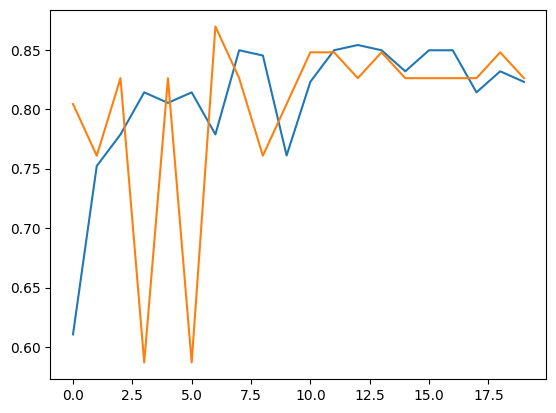

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

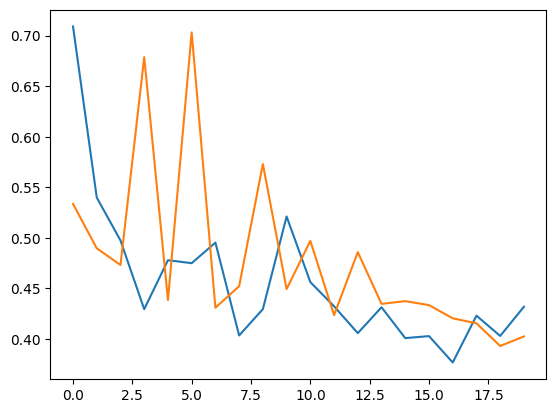

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Testing

In [18]:
test_images = []
for i in range(226,283):
    filename = str(i) + '.jpg'
    img = Image.open(os.path.join('/content/AI_Competition_Softec/softec-aic-2024/Testing Images', filename))
    img = img.resize(img_size)
    img_array = np.array(img) / 255.0
    test_images.append(img_array)

test_images = np.array(test_images)


In [19]:
predictions = model.predict(test_images)


2/2 [==============================] - 1s 37ms/step


In [21]:
test = pd.read_csv('/content/AI_Competition_Softec/softec-aic-2024/Test.csv')
test['Label'] = predictions
test['Label'] = test['Label'].apply(lambda x: 'Mitosis' if x > 0.5 else 'Normal')


In [22]:
test.to_csv('predtions.csv',index=False)

<h1>ROC CURVE PLOT</h1>


2/2 [==============================] - 0s 16ms/step


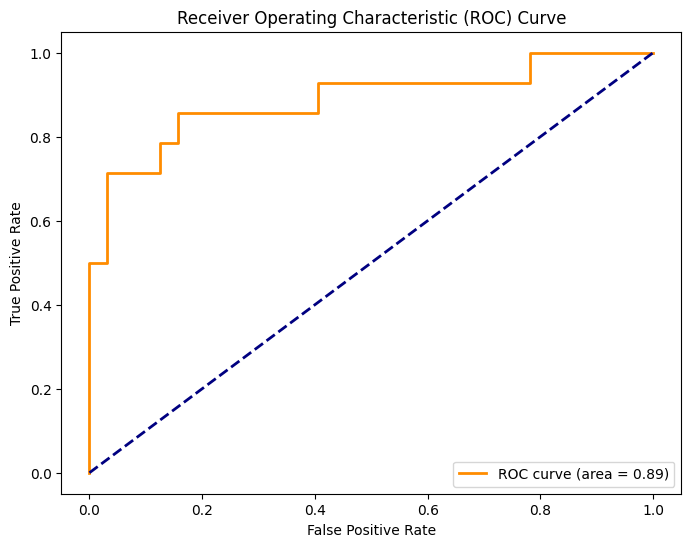

In [23]:
from sklearn.metrics import roc_curve, auc


y_pred_prob = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



<h1>Confusion Matrix</h1>
```



2/2 [==============================] - 0s 17ms/step


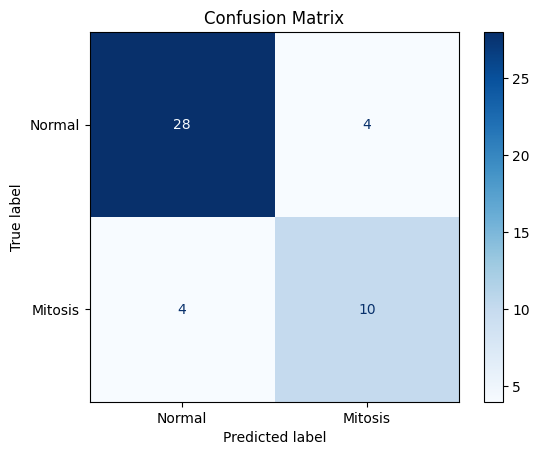

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Mitosis'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


<h1>F1 Score</h1>

In [29]:
from sklearn.metrics import f1_score


y_pred = (model.predict(X_test) > 0.5).astype("int32")

f1 = f1_score(Y_test, y_pred)

print(f"F1-Score: {f1:.4f}")





2/2 [==============================] - 0s 17ms/step
F1-Score: 0.7143
